# Part 1: Implementation of basic bigram model

### Creating Look up table for counts of bigrams [a dictionary]

In [1]:
words = open('/names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
len(words)

32033

In [3]:
bigrams = {}
for word in words:
    word = '.' + word + '.'  # adding start and end tokens for each word
    for ch1, ch2 in zip(word, word[1:]):
        bg = (ch1, ch2)
        bigrams[bg] = bigrams.get(bg, 0) + 1

In [4]:
sorted(bigrams.items(), key = lambda kv: -kv[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

### Creating Look up table for counts of bigrams: Using Tensor rather than dictionary

In [5]:
# Instead of dictionary, it'll be convenient to store
# the above information in the form of a tensor.

In [6]:
unique_chars = ['.'] + (sorted(set(''.join(words))))  # list
stoi = {s:i for i, s in enumerate(unique_chars)}
itos = {i:s for i, s in enumerate(unique_chars)}

print(f'stoi: \n{stoi}\nitos: \n{itos}')

stoi: 
{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
itos: 
{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [7]:
import torch

In [8]:
N = torch.zeros(27, 27)

In [9]:
for word in words:
    word = '.' + word + '.'
    for ch1, ch2 in zip(word, word[1:]):
        ch1_idx = stoi[ch1]
        ch2_idx = stoi[ch2]
        N[ch1_idx, ch2_idx] += 1

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

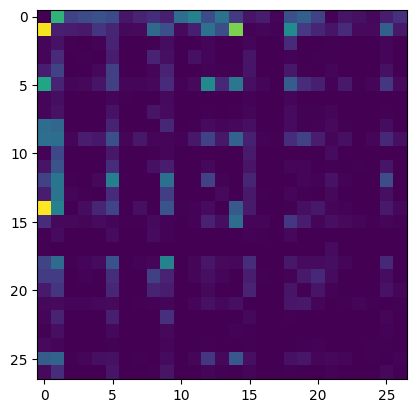

In [11]:
plt.imshow(N)

### Converting this lookup table for counts of bigram into lookup table for probability of a certain word occuring after a certain word

In [12]:
P = (N)/N.sum(axis=1, keepdims=True)

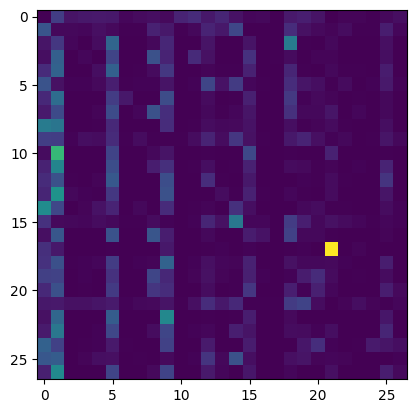

In [13]:
plt.imshow(P)

### Applying smoothing

In [14]:
P = (N+1)/N.sum(axis=1, keepdims=True)
# If we add a much bigger number for smoothing, then probabilities of all the words
# after the current word become uniform. This is because each element in
# the row for a specific word is bumped so much that the original counts,
# being very small, have no more any effect.

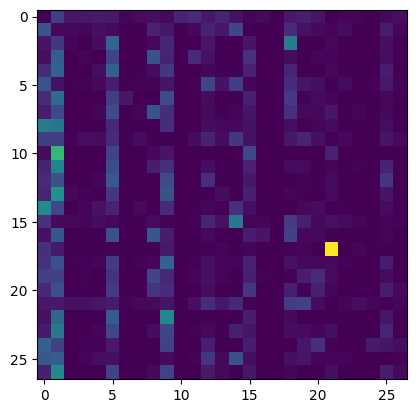

In [15]:
plt.imshow(P)

### Sampling words

In [16]:
for i in range(10):

  output_word = []
  starting_word_index = 0
  while True:
    next_word_probs = P[starting_word_index]
    next_word_index_sampled = torch.multinomial(next_word_probs, num_samples=1,
                                                replacement=True).item()
    output_word.append(itos[next_word_index_sampled])

    if next_word_index_sampled == 0:
      break

    # For next iteration:
    starting_word_index = next_word_index_sampled


  print(''.join(output_word))

eren.
walanazorielaresh.
maemariprrysalohol.
kela.
k.
kya.
jen.
don.
dalyah.
anioushah.


### Calculating Loss

In [17]:
log_likelihood = 0
n = 0

for word in words:
  word = '.' + word + '.'
  for ch1, ch2 in zip(word, word[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    prob = P[idx1, idx2]
    log_prob = torch.log(prob)
    log_likelihood += log_prob
    n += 1

print(f'normalised neg log likelihood is {(-1*log_likelihood)/n}')
# This is the quality of our trained model. The lower it is, the better is our model.
# Maximizing the log likelihood is equal to minimizing negative log likelihood!

normalised neg log likelihood is 2.4515998363494873


# Part 2: Neural net implementation of bigram model

### Creating inputs, and corresponding labels, doing forward pass, computing loss: Baby example

In [18]:
xs, ys = [], []

for word in words[:1]:
  word = '.' + word + '.'
  for ch1, ch2 in zip(word, word[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    xs.append(idx1)
    ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [19]:
# Representing xs as one hot encoded vectors
import torch.nn.functional as F
x_enc = F.one_hot(xs, num_classes=27).float()
x_enc.shape

torch.Size([5, 27])

In [20]:
W = torch.randn((27, 27))  # (no. of inputs to the layer, no. of outputs from layer)
(x_enc @ W).shape # for each of the input example, we have an output from all 27 units of layer

torch.Size([5, 27])

In [21]:
logits = x_enc @ W  # log-counts  [1, 27] [27, 27]
counts = torch.exp(logits)  # [1 27]

probs = counts / counts.sum(1, keepdims=True)  # This represents the probabilities of
# all the 2nd words after the given input word :)

probs


tensor([[0.0448, 0.0418, 0.0702, 0.0058, 0.0149, 0.0142, 0.0215, 0.0156, 0.0504,
         0.0103, 0.0123, 0.0206, 0.0028, 0.0441, 0.0640, 0.0380, 0.0332, 0.0749,
         0.0245, 0.0707, 0.0243, 0.0415, 0.0390, 0.0064, 0.0466, 0.1085, 0.0593],
        [0.0031, 0.0212, 0.0220, 0.0197, 0.0142, 0.0177, 0.0269, 0.0431, 0.0281,
         0.0096, 0.2395, 0.0134, 0.0350, 0.1011, 0.0139, 0.0460, 0.0087, 0.0049,
         0.0086, 0.1619, 0.0673, 0.0066, 0.0265, 0.0109, 0.0104, 0.0261, 0.0137],
        [0.0307, 0.1009, 0.0115, 0.0058, 0.0136, 0.0089, 0.0105, 0.0391, 0.0307,
         0.0236, 0.0480, 0.1116, 0.0250, 0.0336, 0.0036, 0.0080, 0.3422, 0.0116,
         0.0061, 0.0211, 0.0106, 0.0066, 0.0079, 0.0133, 0.0165, 0.0244, 0.0349],
        [0.0307, 0.1009, 0.0115, 0.0058, 0.0136, 0.0089, 0.0105, 0.0391, 0.0307,
         0.0236, 0.0480, 0.1116, 0.0250, 0.0336, 0.0036, 0.0080, 0.3422, 0.0116,
         0.0061, 0.0211, 0.0106, 0.0066, 0.0079, 0.0133, 0.0165, 0.0244, 0.0349],
        [0.0088, 0.0225,

In [22]:
# Probabilities of ouptut word for first example:
probs[0]

tensor([0.0448, 0.0418, 0.0702, 0.0058, 0.0149, 0.0142, 0.0215, 0.0156, 0.0504,
        0.0103, 0.0123, 0.0206, 0.0028, 0.0441, 0.0640, 0.0380, 0.0332, 0.0749,
        0.0245, 0.0707, 0.0243, 0.0415, 0.0390, 0.0064, 0.0466, 0.1085, 0.0593])

In [23]:
print("probability assigned to correct label of first input is: ")
probs[0, ys[0].item()].item()

probability assigned to correct label of first input is: 


0.014162282459437847

### Creating inputs, and corresponding labels, doing forward pass, computing loss, and COMPUTING BACKPASS AS WELL: Not the baby example

In [24]:
xs, ys = [], []

for word in words:
  word = '.' + word + '.'
  for ch1, ch2 in zip(word, word[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    xs.append(idx1)
    ys.append(idx2)

In [25]:
# initializations
xs = torch.tensor(xs)
ys = torch.tensor(ys)

import torch.nn.functional as F
x_enc = F.one_hot(xs, num_classes=27).float()

W = torch.randn((27, 27), requires_grad=True).float()

In [26]:



# Forward pass
logits = x_enc @ W
probs = torch.softmax(logits, dim=1)

# loss
loss = -torch.log(probs[torch.arange(len(xs)), ys]).mean()
print(loss)

tensor(3.8897, grad_fn=<NegBackward0>)


In [27]:
# backward pass
W.grad = None
loss.backward()

W.data += -0.1 * W.grad

### writing respectful nn implementation of bigram model, with custom training loop

In [28]:
xs, ys = [], []

for word in words:
  word = '.' + word + '.'
  for ch1, ch2 in zip(word, word[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    xs.append(idx1)
    ys.append(idx2)

In [29]:
# initializations
xs = torch.tensor(xs)
ys = torch.tensor(ys)

import torch.nn.functional as F
x_enc = F.one_hot(xs, num_classes=27).float()

W = torch.randn((27, 27), requires_grad=True)

In [33]:
# gradient descent
for k in range(100):
  # forward pass
  logits = x_enc @ W
  probs = torch.softmax(logits, dim=1)

  # Loss
  loss = -torch.log(probs[torch.arange(len(xs)), ys]).mean()
  print(loss.item())

  # backward pass
  W.grad = None
  loss.backward()

  # update
  W.data += -75 * W.grad

2.507493734359741
2.4657723903656006
2.459831953048706
2.4592928886413574
2.459101915359497
2.459019184112549
2.4589755535125732
2.458940029144287
2.4589178562164307
2.4588887691497803
2.4588711261749268
2.458843469619751
2.458827257156372
2.4588005542755127
2.458785057067871
2.458758592605591
2.458744525909424
2.4587178230285645
2.458704948425293
2.4586782455444336
2.4586665630340576
2.4586398601531982
2.4586293697357178
2.4586026668548584
2.4585928916931152
2.458566665649414
2.4585578441619873
2.458530902862549
2.4585235118865967
2.4584968090057373
2.4584903717041016
2.458462953567505
2.4584577083587646
2.458430767059326
2.4584269523620605
2.4583990573883057
2.4583961963653564
2.4583683013916016
2.458366870880127
2.4583380222320557
2.4583377838134766
2.4583089351654053
2.4583096504211426
2.458280563354492
2.458282232284546
2.4582526683807373
2.4582560062408447
2.458225727081299
2.458230495452881
2.4581992626190186
2.458205223083496
2.4581735134124756
2.4581806659698486
2.458148479461

In [45]:
# sampling
for i in range(5):
  out = []

  ix = 0
  while True:
    ix = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = ix @ W
    counts = torch.exp(logits)
    probs = counts / counts.sum(dim=1, keepdims=True)

    ix = torch.multinomial(probs, num_samples=1, replacement=True).item()
    out.append(itos[ix])

    if ix == 0:
      break

  print(''.join(out))

zy.
eyuitiah.
chrimiayaria.
nnniaa.
mandan.
